In [3]:
# this cell import keras and the dataset we want to use
import keras
print(keras.__version__)
from keras.datasets import fashion_mnist
from keras import models, layers

/Users/garethjones/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/garethjones/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:955: UserWarning: Illegal line #3
	""""
"
	in file "/Users/garethjones/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/matplotlibrc"
  warnings.warn('Illegal %s' % error_details)
/Users/garethjones/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:955: UserWarning: Illegal line #7
	""""
"
	in file "/Users/garethjones/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/matplotlibrc"
  warnings.warn('Illegal %s' % error_details)

Bad key "Created on Thu May 24 09" on line 4 in
/Users/garethjones/anaconda3/lib/python3.6/site-packages/matplotl

2.2.2


In [4]:
model = models.Sequential()
model.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
model.add(layers.Dense(10,activation='softmax'))
model.summary() # this gives a summary of the layers that are being used in the neural network
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy']) # you compile the network before you run it

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


/Users/garethjones/anaconda3/lib/python3.6/site-packages/matplotlib/style/core.py:203: UserWarning: In /Users/garethjones/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/gj.mplstyle: Bad val "cycler('color', ['DarkCerulean','Cardinal','DarkSpringGreen','Eggplant','Gamboge','Gray'])" on line #2
	"axes.prop_cycle: cycler('color', ['DarkCerulean','Cardinal','DarkSpringGreen','Eggplant','Gamboge','Gray'])
"
	in file "/Users/garethjones/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/gj.mplstyle"
	Key axes.prop_cycle: 'cycler('color', ['DarkCerulean','Cardinal','DarkSpringGreen','Eggplant','Gamboge','Gray'])' is not a valid cycler construction: DarkCerulean does not look like a color arg
  warnings.warn(message)


Train: (60000, 28, 28)
Test: (10000, 28, 28)


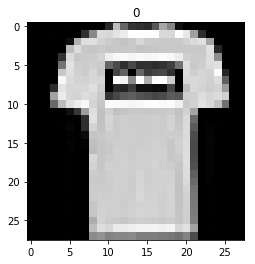

Before: 0
After: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [5]:
# magic trick to make sure matplotlib works
%matplotlib inline 
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
# this shows us the number of samples, and the shape of each sample. In our case, the sample is a 2D image of 28x28 pixels
print("Train:", train_images.shape)
print("Test:", test_images.shape)

# this plots the selected sample image
# set cmap=gray to stop matplotlib applying a colormap and making the data 3D
plt.imshow(train_images[1],cmap='gray')
plt.title(str(train_labels[1]))
plt.show()


# this is data science area, essentially cleaning up the data before feeding to the model
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype("float32")/255.0

test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype("float32")/255.0

from keras.utils import to_categorical

# categorical puts our training label into vector form, a perfect probability distribution
# it goes through the dataset and works out how many classes there are itself
# this is essentially one-hot encoding
print("Before:",train_labels[1])
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
print("After:",train_labels[1])

In [6]:
# this shows us the metrics such as accuracy, without optimising by changing the weights and biases
# in the first instance, the weights are randomly assigned, hence every time you run this you will get different numbers
model.evaluate(train_images,train_labels)

60000/60000 [==============================] - 38s 641us/step


[2.4750347106933592, 0.08036666666666667]

In [9]:
# we use predict to show for a given sample, how likely will it be assigned to a given class
# you use this every time you run your neural network, rather than evaluate which is used once at the end
# the predict function (like fit and evaluate) expects a vector, rather than one number
print(model.predict(train_images[0:1]))

# we can use max to get the max probability across the classes, and argmax to show the index point along the classes
import numpy as np
print('The max probabilty found is', np.max(model.predict(train_images[0:1])))
print('The index of the max probability is', np.argmax(model.predict(train_images[0:1])))

# we can check whether is was right, by looking at the correctly assigned label
print(train_labels[0])

[[0.04344845 0.15515986 0.09870532 0.24375999 0.14518662 0.10539486
  0.03525527 0.05023524 0.07343724 0.04941712]]
The max probabilty found is 0.24375999
The index of the max probability is 3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [42]:
# you could change the number of epochs here if you you think you need to do more training
# batch size will always be power of 2
# you can do fitting as often as you like, but it won't reset the model. So if you run again, it 
# fit will return an object called history that contains lots of information about your model over time
history = model.fit(train_images,train_labels,epochs=5,batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 72s 1ms/step - loss: 0.0282 - acc: 0.9913
Epoch 2/5
60000/60000 [==============================] - 72s 1ms/step - loss: 0.0218 - acc: 0.9938
Epoch 3/5
60000/60000 [==============================] - 70s 1ms/step - loss: 0.0170 - acc: 0.9951
Epoch 4/5
60000/60000 [==============================] - 76s 1ms/step - loss: 0.0131 - acc: 0.9964
Epoch 5/5
60000/60000 [==============================] - 72s 1ms/step - loss: 0.0097 - acc: 0.9976


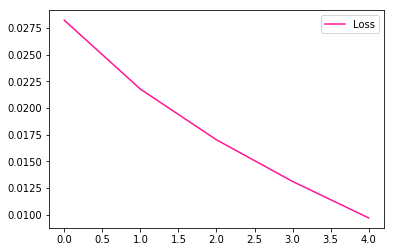

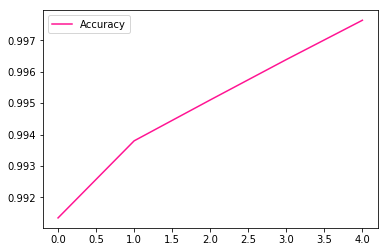

In [45]:
# we can then plot elements of history that are stored such as loss and accuracy of the model over time
plt.plot(history.history['loss'],label='Loss')
plt.legend()
plt.show()
plt.close()

plt.plot(history.history["acc"],label='Accuracy')
plt.legend()
plt.show()
plt.close()

In [17]:
test_loss, test_acc = model.evaluate(train_images,train_labels)
print(test_loss,test_acc)

# you can do this again with test images and labels to see if the model is working 

60000/60000 [==============================] - 40s 662us/step
0.022688862531185926 0.9934166666666666
